In [38]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [39]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [15]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Exploratory Data Analysis

In [16]:
df['ADDRTYPE'].value_counts().to_frame()

,ADDRTYPE
Block,126926
Intersection,65070
Alley,751


In [17]:
df['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [18]:
df['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [19]:
df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [25]:
# Preprocessing

df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

## Visualizations

In [20]:
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



In [22]:
import seaborn as sns

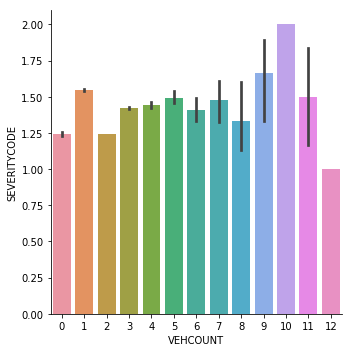

In [27]:
sns.catplot(x="VEHCOUNT", y="SEVERITYCODE", kind="bar", data=df);

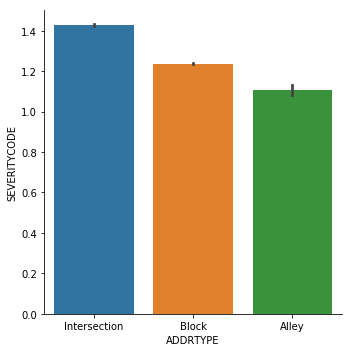

In [28]:
sns.catplot(x="ADDRTYPE", y="SEVERITYCODE", kind="bar", data=df);

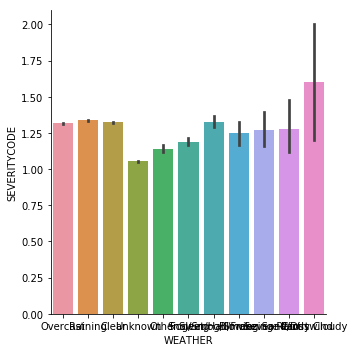

In [29]:
sns.catplot(x="WEATHER", y="SEVERITYCODE", kind="bar", data=df);

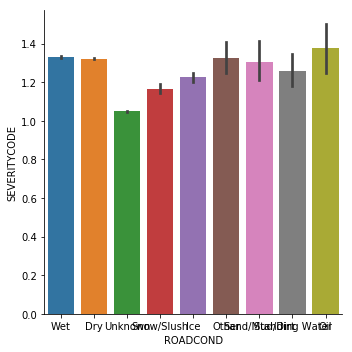

In [30]:
sns.catplot(x="ROADCOND", y="SEVERITYCODE", kind="bar", data=df);

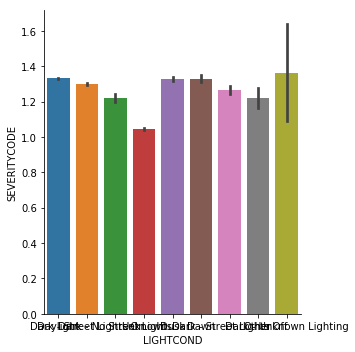

In [36]:
sns.catplot(x="LIGHTCOND", y="SEVERITYCODE", kind="bar", data=df);

In [40]:
Feature = df[['VEHCOUNT']]
Feature = pd.concat([Feature,pd.get_dummies(df['ADDRTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['LIGHTCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['SPEEDING'])], axis=1)
Feature.drop(['Unknown'], axis = 1,inplace=True)
Feature.drop(['Other'], axis = 1,inplace=True)

Feature.head()

,VEHCOUNT,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,...,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Y
0,2,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,3,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [41]:
# Selecting the columns I want to use
X = Feature
y = df['SEVERITYCODE']
X.head()

,VEHCOUNT,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,...,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Y
0,2,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,3,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [42]:
X= preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [44]:
k = 14
best_knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

In [45]:
yhat = best_knn_model.predict(X_test)

In [46]:
accuracy = metrics.accuracy_score(y_test, yhat)
accuracy

0.7274688583536664

In [47]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [48]:
jaccard_similarity_score(y_test, yhat)

0.7274688583536664

In [49]:
f1_score(y_test, yhat, average='weighted') 

0.672869493072543